In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv('Fraud_check.csv')

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
data = data.rename({'Undergrad':'Under_Grad', 'Marital.Status':'Marital_status', 'Taxable.Income':'Taxable_Income',
                    'City.Population':'City_Population', 'Work.Experience':'Work_Experience'}, axis = 1)


In [8]:
data

,Under_Grad,Marital_status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [10]:
data.describe()

,Taxable_Income,City_Population,Work_Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


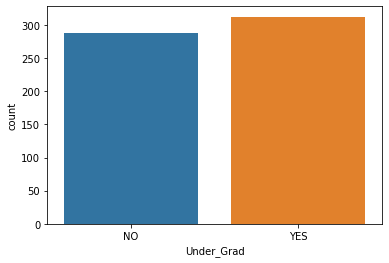

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


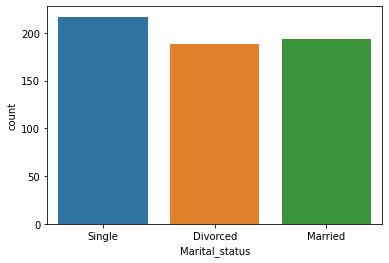

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


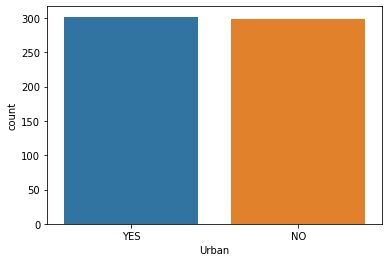

In [11]:
import seaborn as sns

sns.countplot(data['Under_Grad'])
plt.show()

sns.countplot(data['Marital_status'])
plt.show()

sns.countplot(data['Urban'])
plt.show()

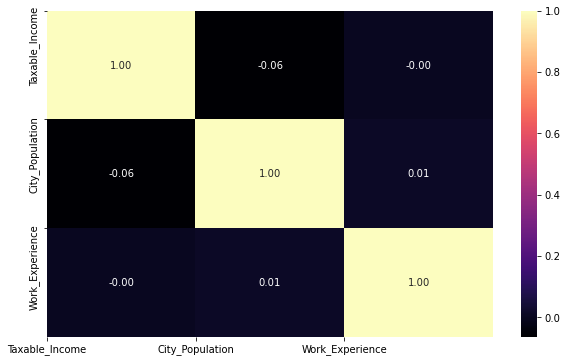

In [12]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [13]:
data['Taxable_Category'] = pd.cut(x = data['Taxable_Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data

,Under_Grad,Marital_status,Taxable_Income,City_Population,Work_Experience,Urban,Taxable_Category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable_Category', ylabel='count'>

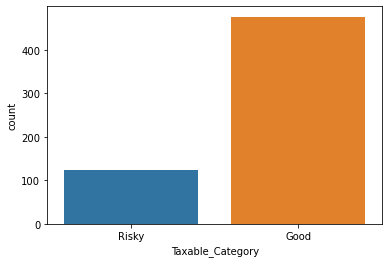

In [14]:
sns.countplot(data['Taxable_Category'])

In [15]:
data['Taxable_Category'].value_counts()

Good     476
Risky    124
Name: Taxable_Category, dtype: int64

In [16]:
label_encoder = preprocessing.LabelEncoder()

data['Under_Grad'] = label_encoder.fit_transform(data['Under_Grad'])
data['Marital_status'] = label_encoder.fit_transform(data['Marital_status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['Taxable_Category'] = label_encoder.fit_transform(data['Taxable_Category'])
data.sample(15)

,Under_Grad,Marital_status,Taxable_Income,City_Population,Work_Experience,Urban,Taxable_Category
519,1,2,60915,162102,25,1,0
568,0,2,68617,150036,22,1,0
404,1,0,91545,34334,21,1,0
593,0,0,84775,131963,10,1,0
486,1,2,80083,57230,29,1,0
200,1,2,61906,162777,17,1,0
494,0,2,39562,197045,13,1,0
262,0,0,69540,120415,21,0,0
279,1,2,56438,74136,12,1,0
81,1,0,35610,121608,24,0,0


In [17]:
data1 = data.drop('Taxable_Income', axis = 1)
data1

,Under_Grad,Marital_status,City_Population,Work_Experience,Urban,Taxable_Category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [20]:
x = data1.drop('Taxable_Category', axis = 1)
y = data1['Taxable_Category']

In [21]:
x

,Under_Grad,Marital_status,City_Population,Work_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable_Category, Length: 600, dtype: int32

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.39, random_state= 45)

In [24]:
x_train

,Under_Grad,Marital_status,City_Population,Work_Experience,Urban
524,1,1,164391,27,0
382,1,0,139269,29,0
437,1,1,117250,20,1
44,1,0,98880,22,0
584,0,0,155684,4,1
...,...,...,...,...,...
377,1,2,103490,30,0
580,1,0,123335,1,1
163,1,0,91851,15,1
544,0,2,133877,21,1


In [25]:
x_test

,Under_Grad,Marital_status,City_Population,Work_Experience,Urban
491,0,0,82029,10,0
4,0,1,27533,28,0
64,1,2,118261,15,0
407,0,2,52144,6,0
61,1,1,86169,8,0
...,...,...,...,...,...
392,1,0,37776,15,0
47,1,2,34964,2,0
312,1,2,31641,18,0
549,0,1,74058,11,1


In [26]:
y_train

524    1
382    0
437    1
44     0
584    0
      ..
377    0
580    0
163    1
544    1
414    0
Name: Taxable_Category, Length: 366, dtype: int32

In [27]:
y_test

491    1
4      0
64     0
407    0
61     1
      ..
392    1
47     0
312    0
549    0
446    1
Name: Taxable_Category, Length: 234, dtype: int32

In [31]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 2)
model_c5.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2)

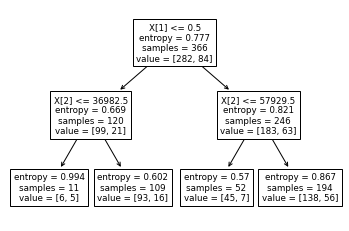

In [32]:
tree.plot_tree(model_c5);

In [33]:
data1.columns

Index(['Under_Grad', 'Marital_status', 'City_Population', 'Work_Experience',
       'Urban', 'Taxable_Category'],
      dtype='object')

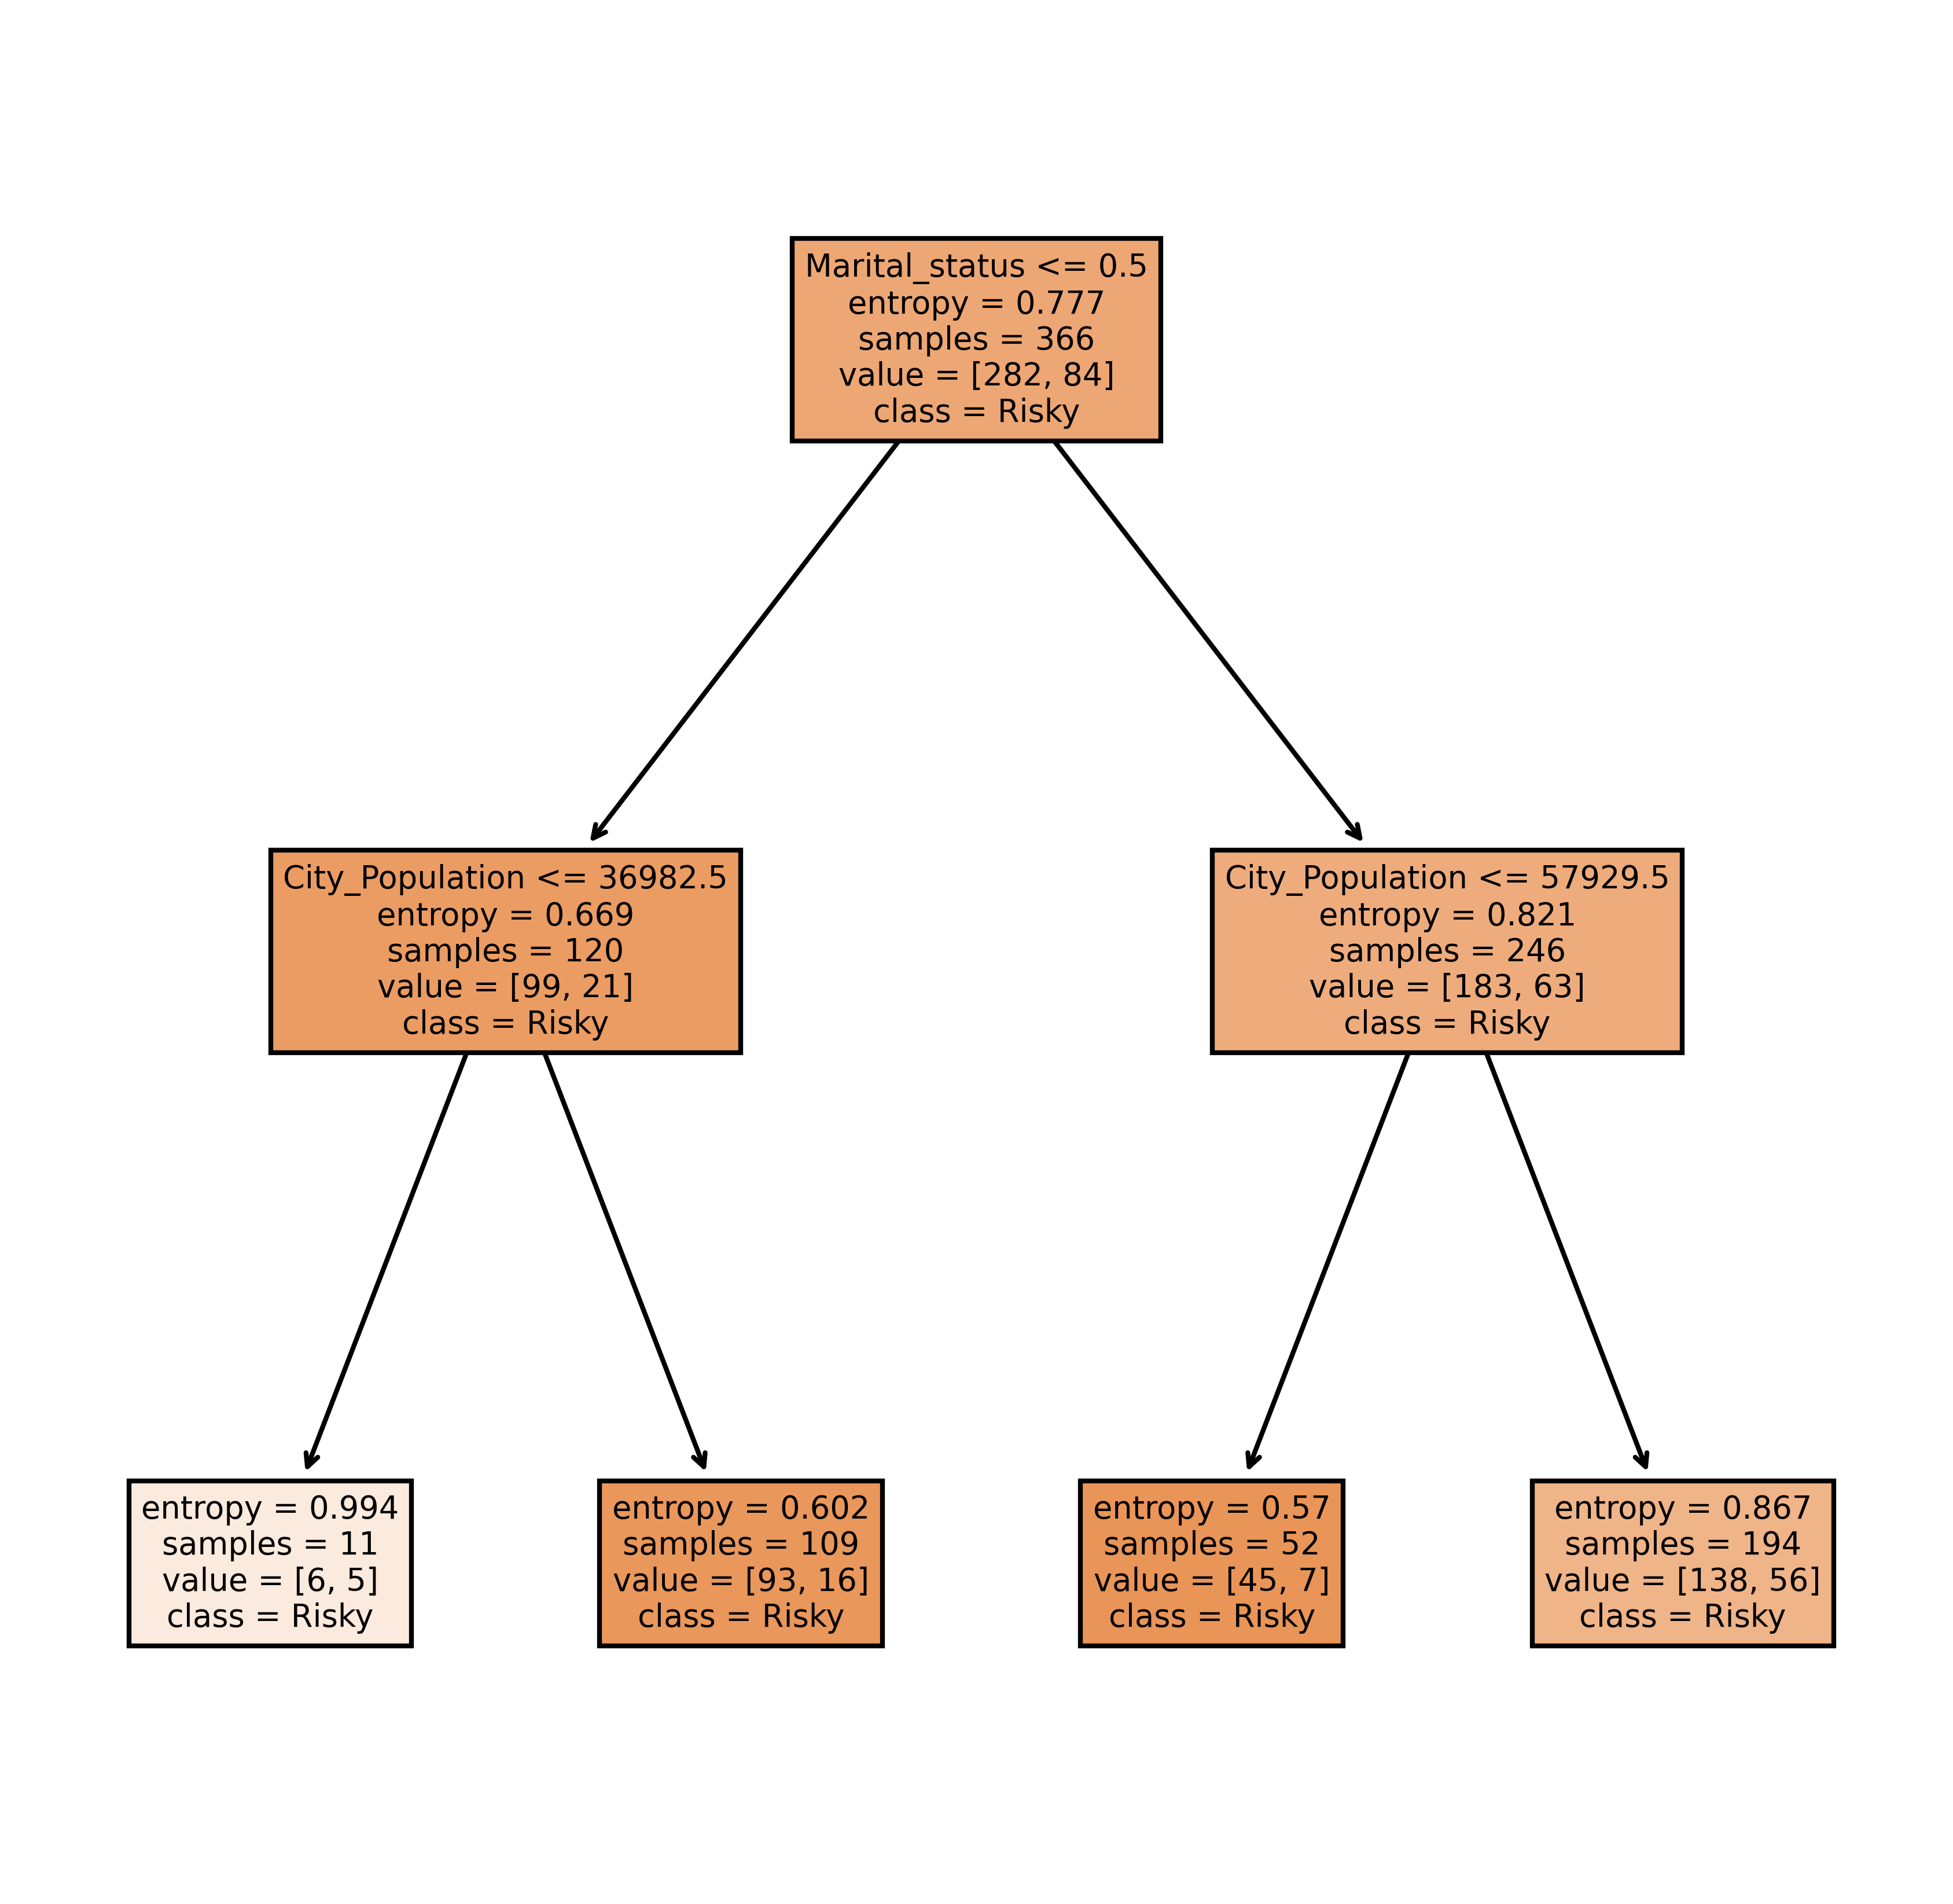

In [35]:
fn=['Under_Grad', 'Marital_status', 'City_Population', 'Work_Experience',
       'Urban', 'Taxable_Category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=600)
tree.plot_tree(model_c5,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [36]:
preds = model_c5.predict(x_test)
pd.Series(preds).value_counts()

0    234
dtype: int64

In [37]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
pd.crosstab(y_test, preds)

col_0,0
Taxable_Category,
0,194
1,40


In [39]:
model_c5.score(x_test, y_test)

0.8290598290598291

In [40]:
model_c5.score(x_train, y_train)

0.7704918032786885